<a href="https://colab.research.google.com/github/brillync/AI/blob/main/Build_an_ML_Model_Troubleshooting_of_Vehicle_Plate_Area_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
Di zaman modern ini, transportasi sudah menjadi salah satu elemen penting dalam kehidupan masyarakat sehari-hari.
Kendaraan menjadi pilihan utama  banyak orang untuk melakukan aktivitas sehari-hari seperti bekerja, berbelanja, dan berlibur.
Namun, dengan meningkatnya kendaraan di jalan raya, masalah  lalu lintas dan parkir juga  meningkat.
Salah satu permasalahan utamanya adalah meningkatnya kemacetan lalu lintas dan kesulitan dalam mencari tempat parkir yang tersedia.
## Tujuan Penelitian
Tujuan dari penelitian ini adalah untuk mengefektifkan sistem yang dapat membantu dalam pengelolaan lalu lintas dan parkir kendaraan.
1. Mengidentifikasi dan menganalisis pola lalu lintas jalan untuk mengidentifikasi titik kemacetan.
2. Bangun model prediktif untuk memilih tempat parkir yang tersedia berdasarkan data historis.
3. Meningkatkan efisiensi pembayaran tol otomatis melalui penggunaan sensor dan identifikasi kendaraan.
## Rumusan Masalah
Dalam konteks ini, rumusan masalah yang dihadapi adalah bagaimana meningkatkan manajemen lalu lintas dan parkir kendaraan untuk mengurangi kemacetan dan meningkatkan efisiensi transportasi.
1.Bagaimana cara mengidentifikasi tempat parkir yang tersedia secara efisien?
2.Bagaimana cara memantau lalu lintas dan mengidentifikasi titik kemacetan?
3.Bagaimana  pembayaran tol otomatis dapat dioptimalkan untuk menjamin kelancaran perjalanan?
## Data yang akan dipakai
Nama Data : Vehicle Dataset

Sumber Data : https://www.kaggle.com/datasets/skyecai/vehicle-dataset/data

Deskripsi Data : Dataset ini berisi fitur-fitur tentang model kendaraan yang ada, informasi tentang kendaraan yang meliputi berbagai atribut, seperti model, dan tahun pembuatan. Dataset ini untuk mendukung analisis dan pemodelan terkait dengan pemilihan area plat kendaraan, pemantauan lalu lintas jalan, pembayaran tol otomatis, manajemen parkir, dan aplikasi lainnya dalam bidang transportasi.

## Metode
1. Algoritma k-means: Algoritma k-means merupakan algoritma klasterisasi yang menggunakan rumus k-means untuk mencari kelompokan area plat kendaraan berdasarkan kriteria seperti jenis kendaraan, warna, dan ukuran plat.

2. Logistic Regression: Logistic Regression merupakan algoritma supervised learning yang digunakan untuk memprediksi kelas berdasarkan kriteria tertentu. Dalam pemecahan masalah pemilihan area plat kendaraan, logistic regression dapat digunakan untuk memprediksi kelas area plat berdasarkan kriteria seperti jenis kendaraan, warna, dan ukuran plat.

3. Decision Tree: Decision Tree merupakan algoritma supervised learning yang digunakan untuk membuat model pengambilan keputusan berdasarkan kriteria tertentu. Dalam pemecahan masalah pemilihan area plat kendaraan, decision tree dapat digunakan untuk membuat model pengambilan keputusan berdasarkan kriteria seperti jenis kendaraan, warna, dan ukuran plat.

4. Random Forest: Random Forest merupakan algoritma ensemble learning yang digunakan untuk membuat model pengambilan keputusan berdasarkan kriteria tertentu. Dalam pemecahan masalah pemilihan area plat kendaraan, random forest dapat digunakan untuk membuat model pengambilan keputusan berdasarkan kriteria seperti jenis kendaraan, warna, dan ukuran plat.

# Preparation | Persiapan
## Import Libraries

In [46]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report

## Get Data | Mendapatkan Data

In [47]:

# Load the data
data = pd.read_csv('auto-mpg.csv')

# Display the first few rows
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [49]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Explore Data (EDA) | Eksplorasi Data

In [50]:
# Transform some categorical variables to numerical variables
data[['car name','horsepower']] = \
data[['car name','horsepower']].apply(pd.to_numeric, errors='coerce')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,1,NaN
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,NaN
394,44.0,4,97.0,52.0,2130,24.6,82,2,NaN
395,32.0,4,135.0,84.0,2295,11.6,82,1,NaN
396,28.0,4,120.0,79.0,2625,18.6,82,1,NaN


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      0 non-null      float64
dtypes: float64(5), int64(4)
memory usage: 28.1 KB


In [52]:
categorical_variable = data[['car name']]
numerical_variable = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',\
                                   'acceleration', 'weight', 'model year', 'origin']]

In [53]:
for x in categorical_variable:
    print('{}: \n'.format(x), '{} \n'.format(data[x].value_counts()))

car name: 
 Series([], Name: count, dtype: int64) 



In [55]:
# We draw hist plots for all numerical variables, to explore features of each one.
import matplotlib.pyplot as plt

def hist_plot(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(data[variable], bins=50, color="#8e82fe")
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + variable)
    plt.show()

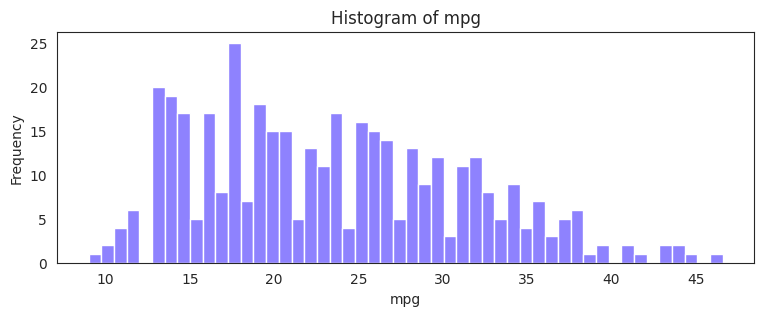

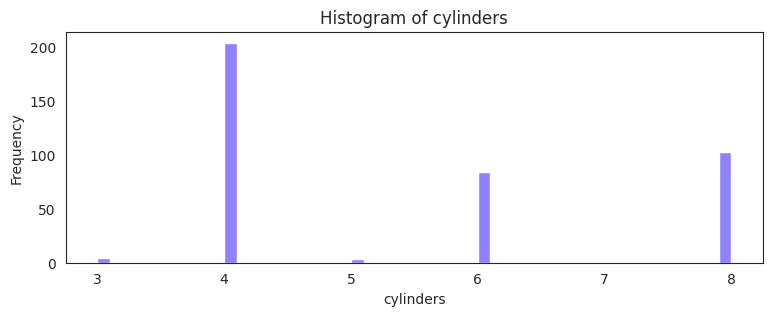

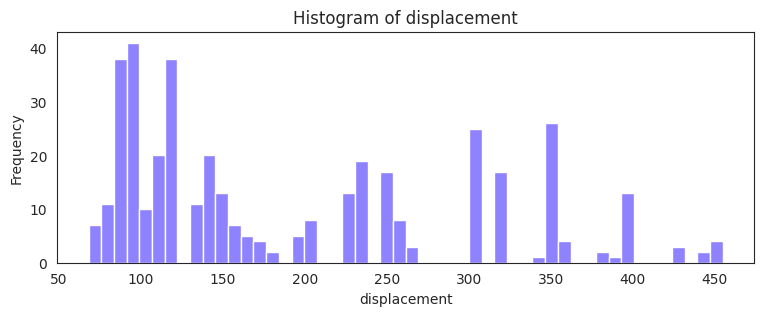

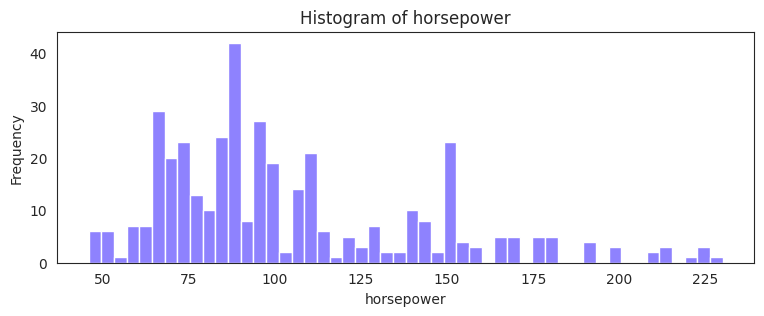

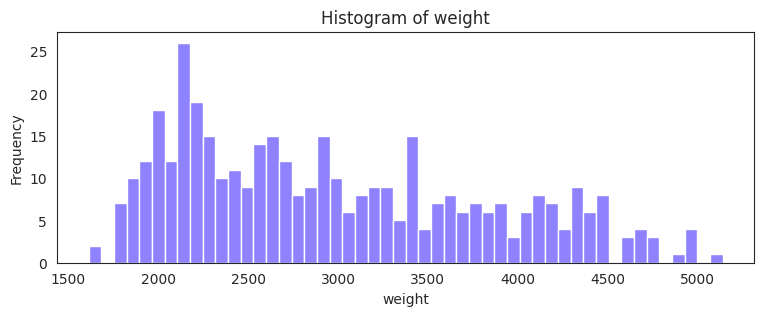

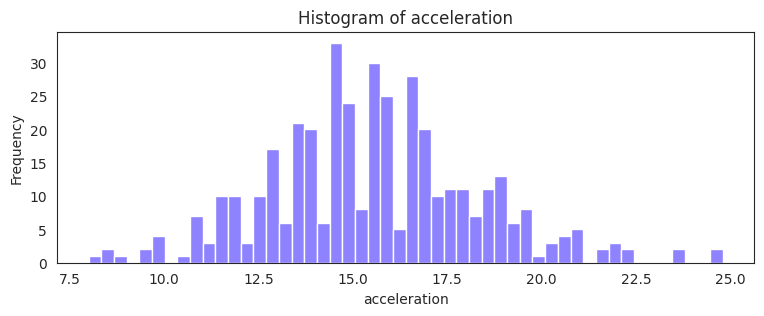

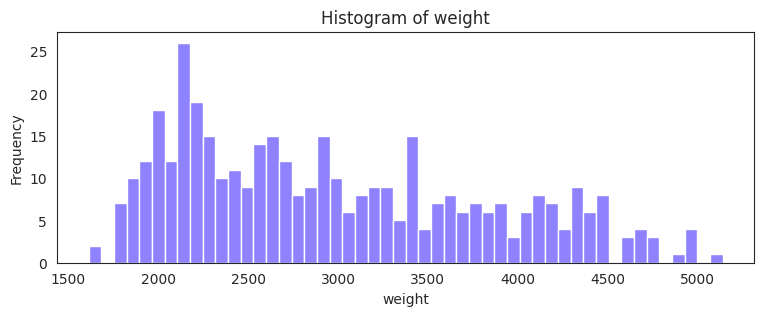

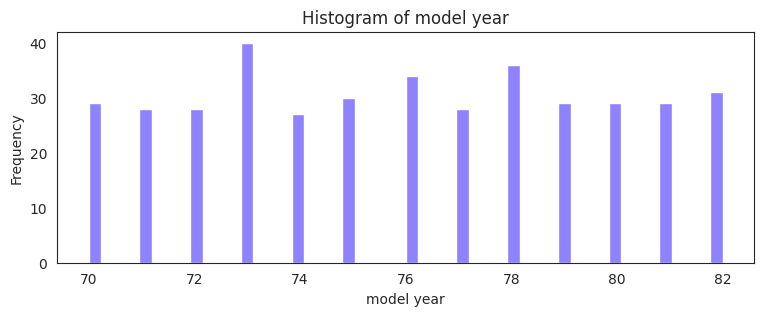

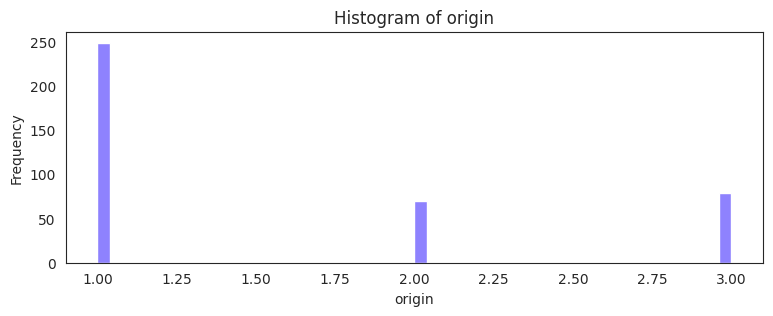

In [56]:
for y in numerical_variable:
    hist_plot(y)

###Check for missing values

In [57]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
model year        0
origin            0
car name        398
dtype: int64


In [58]:
data.duplicated().sum()

0


### Visualisations

<Axes: >

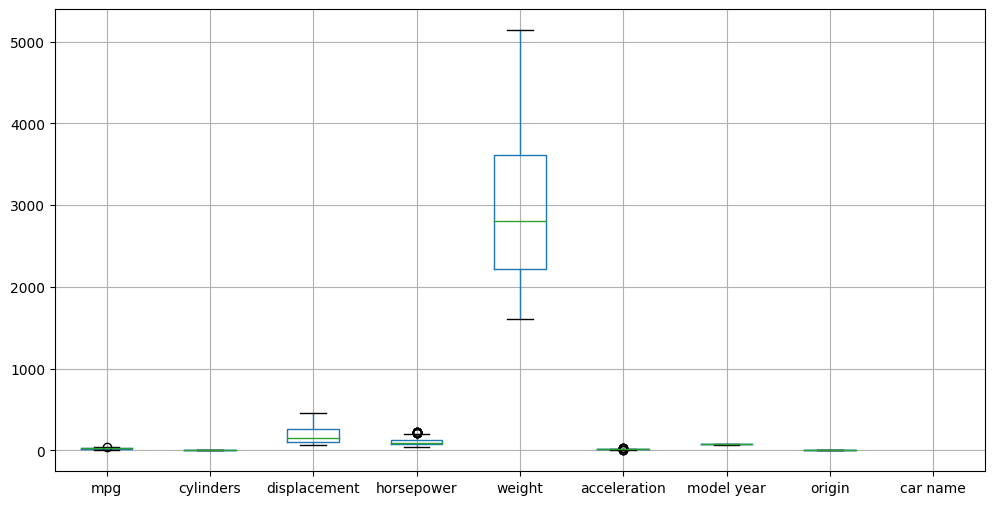

In [14]:
data.boxplot(figsize = (12,6))

### Summary

In [60]:
# Calculate basic summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  car name  
count    398.000000  398.000000  398.000000       0.0  
mean      15.568090   76.010050    1.572864       NaN  
std        2.757689    3.697627    0.802055       NaN  
min        8.000000   70.000000    1.000000       NaN  
25%       13.825000   73.000000    1.000000       

### Variability and Spread

In [61]:
# Calculate range, variance, and standard deviation for numerical columns
range_values = data[numerical_columns].max() - data[numerical_columns].min()
variance_values = data[numerical_columns].var()
std_deviation = data[numerical_columns].std()

print("\nRange of numerical columns:")
print(range_values)
print("\nVariance of numerical columns:")
print(variance_values)
print("\nStandard Deviation of numerical columns:")
print(std_deviation)


Range of numerical columns:
mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
model year        12.0
origin             2.0
car name           NaN
dtype: float64

Variance of numerical columns:
mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1481.569393
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
car name                  NaN
dtype: float64

Standard Deviation of numerical columns:
mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.491160
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
car name               NaN
dtype: float64


### Correlation

In [63]:
#selecting the numeric columns
numeric_columns = data.select_dtypes(include = ['int64', 'float64'])

def outlier_detection(column):
    # calculating the quantiles for each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # calculating lower bound and upper bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(data)) * 100
        return column, percentage

In [64]:
columns_with_outliers = [outlier_detection(column) for column in numeric_columns.columns]
columns_with_outliers = [(column,percentage) for column, percentage in columns_with_outliers if column is not None]

In [65]:
for column, percentage in columns_with_outliers:
    print(f"Column Name : {column}, Percentage of outliers : {percentage:.2f}%")

Column Name : mpg, Percentage of outliers : 0.25%
Column Name : horsepower, Percentage of outliers : 2.51%
Column Name : acceleration, Percentage of outliers : 1.76%


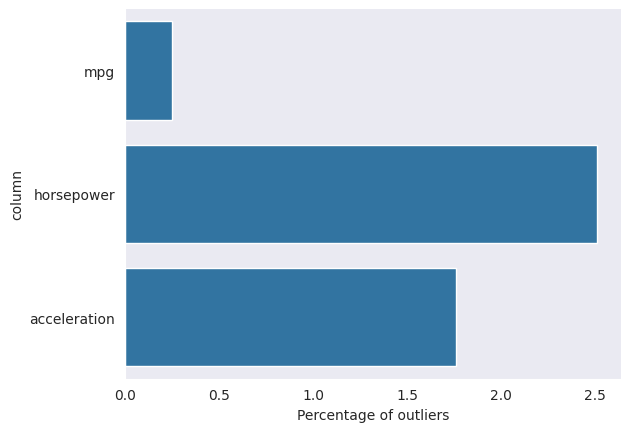

In [66]:
temp = pd.DataFrame(columns_with_outliers, columns = ['column', 'percentage'])

sns.set_style('dark')
sns.barplot(data = temp, y = 'column', x = 'percentage')
plt.xlabel("Percentage of outliers")
sns.despine()
plt.show()

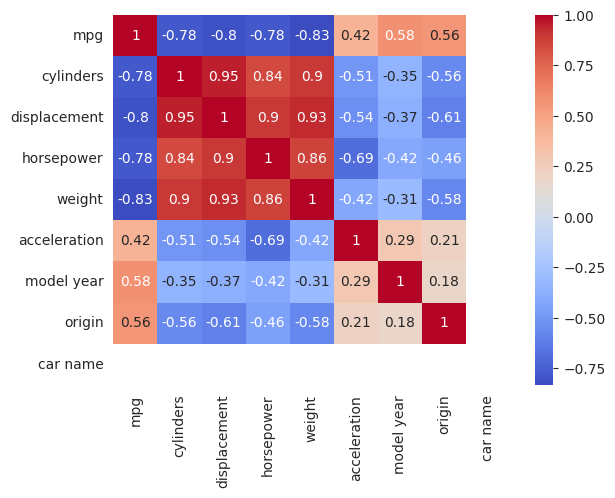

In [67]:
# multicollinearity check

corr_matrix = numeric_columns.corr()


sns.set_style('white')
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [68]:
# Calculate range, variance, and standard deviation for numerical columns
range_values = data[numerical_columns].max() - data[numerical_columns].min()
variance_values = data[numerical_columns].var()
std_deviation = data[numerical_columns].std()

print("\nRange of numerical columns:")
print(range_values)
print("\nVariance of numerical columns:")
print(variance_values)
print("\nStandard Deviation of numerical columns:")
print(std_deviation)


Range of numerical columns:
mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
model year        12.0
origin             2.0
car name           NaN
dtype: float64

Variance of numerical columns:
mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1481.569393
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
car name                  NaN
dtype: float64

Standard Deviation of numerical columns:
mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.491160
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
car name               NaN
dtype: float64


## Clean Data | Membersihkan Data

In [69]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
model year        0
origin            0
car name        398
dtype: int64


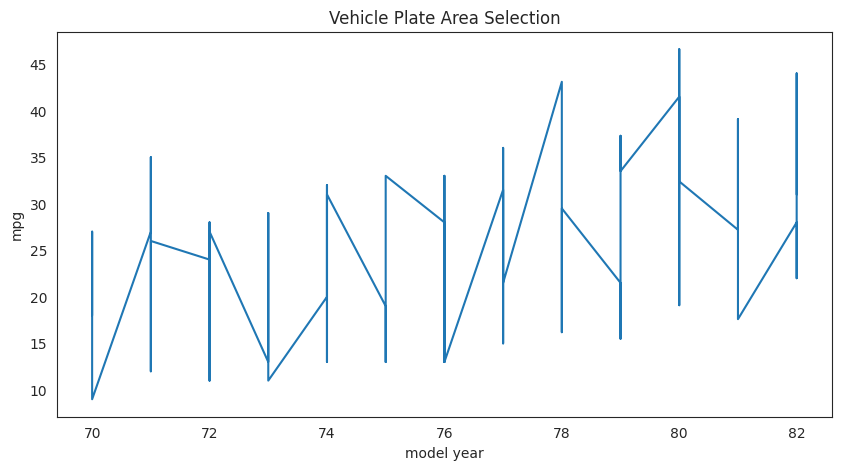

In [77]:
data.fillna(method='ffill', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(data['model year'], data['mpg'])
plt.title('Vehicle Plate Area Selection')
plt.xlabel('model year')
plt.ylabel('mpg')
plt.show()

In [70]:
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of Duplicate Rows:", num_duplicates)

# Display duplicate rows
duplicate_data = data[duplicate_rows]
print("Duplicate Rows:")
print(duplicate_data)

Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


## Outliers

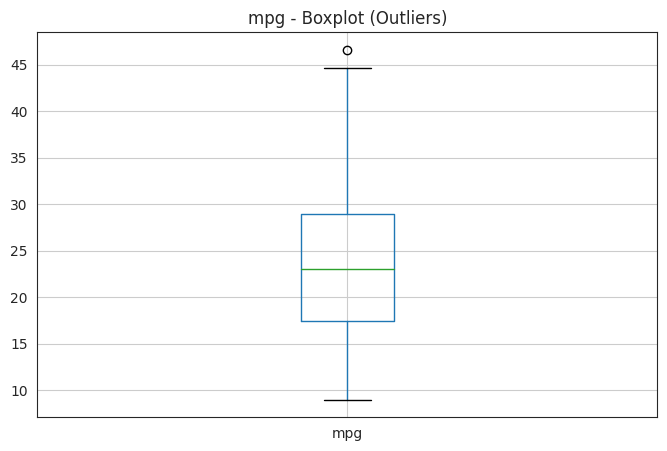

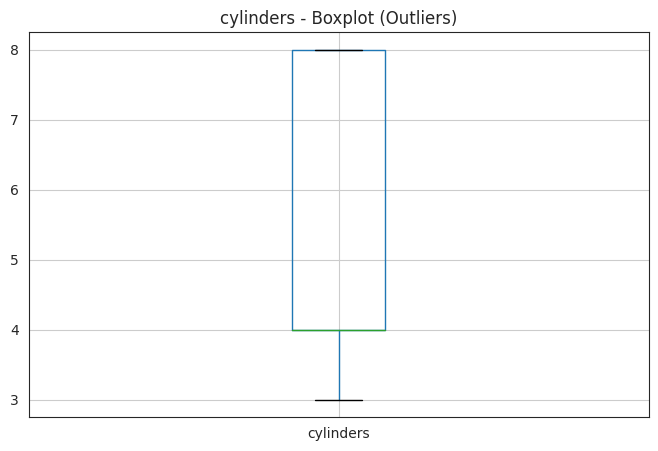

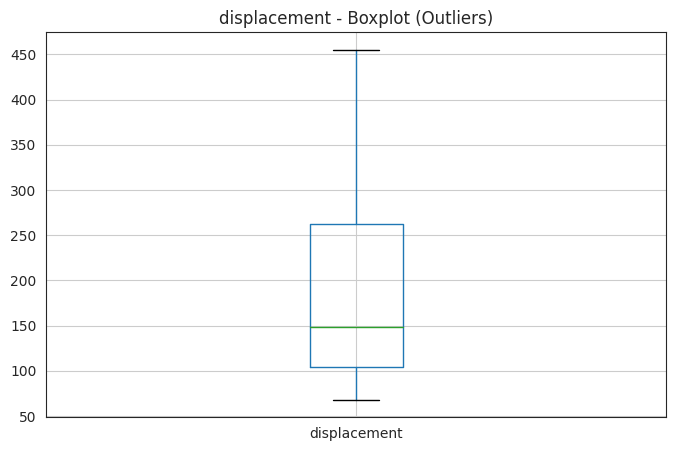

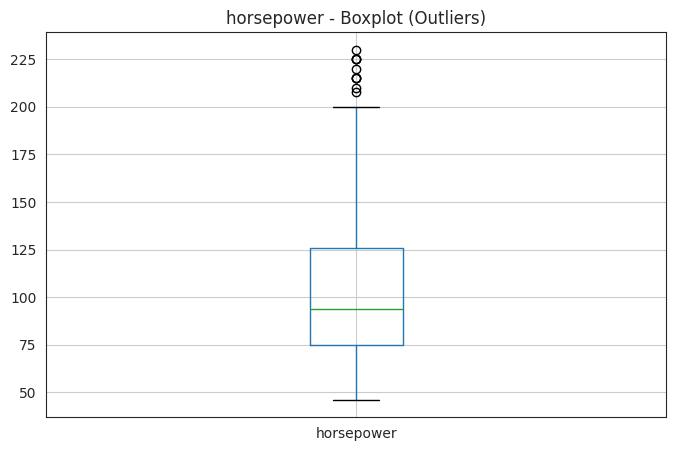

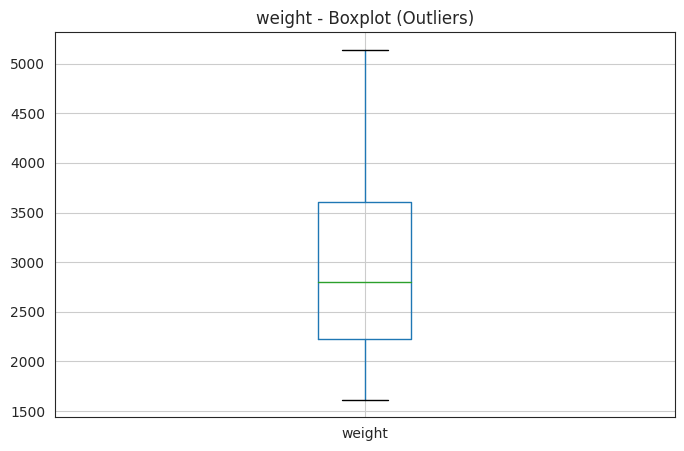

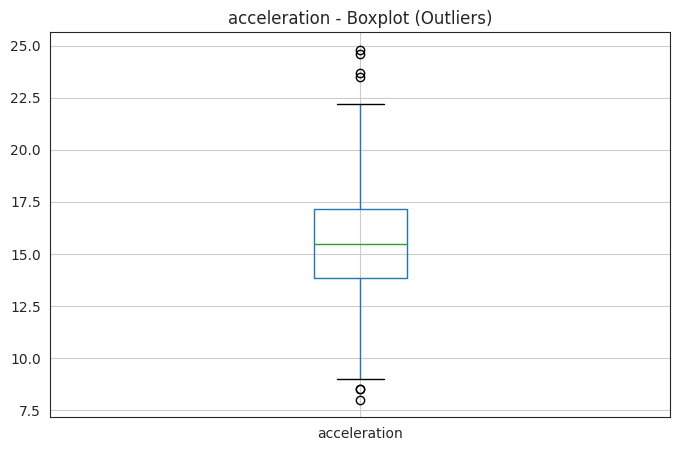

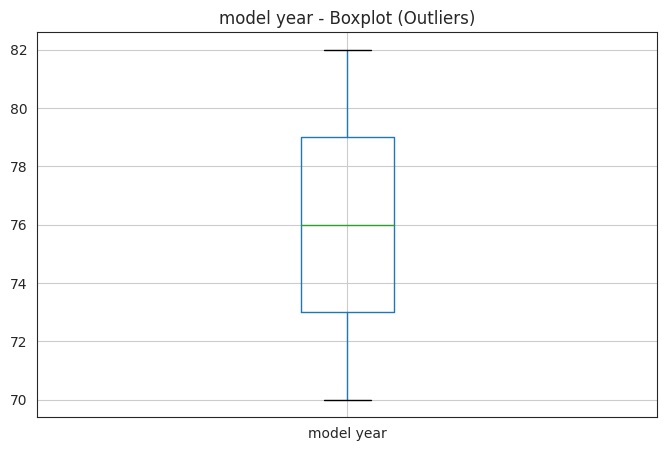

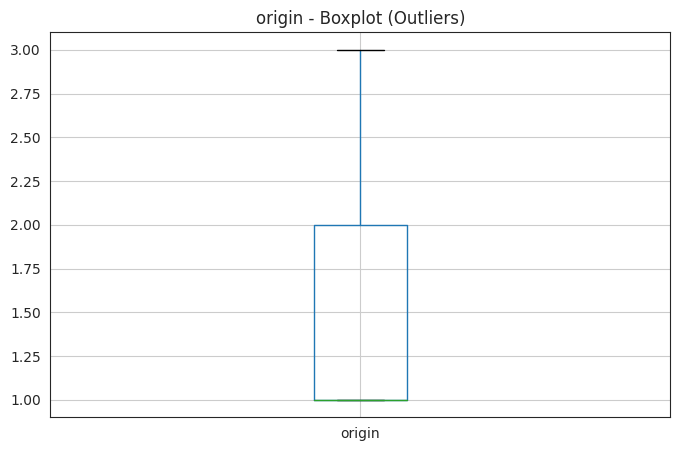

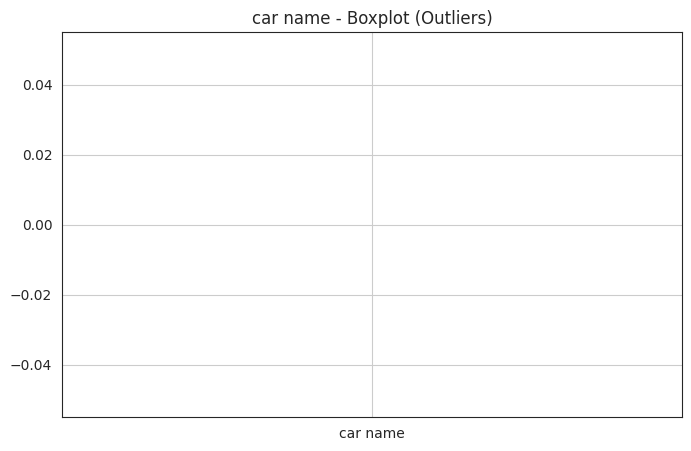

In [71]:
import matplotlib.pyplot as plt

# Create boxplots for numerical columns to visualize outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=col)
    plt.title(col + ' - Boxplot (Outliers)')
    plt.show()

In [72]:
def identify_outliers(data, columns, threshold=1.5):
    """
    Identify outliers in the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with rows flagged as outliers along with the column name and reason.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - outliers_df: DataFrame with flagged outliers and reasons
    """
    outliers_info = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Add information for each outlier row
        for index, row in outliers.iterrows():
            outlier_info = {
                'Value': row[col],
                'Column': col,
                'Reason': 'Below Lower Bound' if row[col] < lower_bound else 'Above Upper Bound'
            }
            outliers_info.append(outlier_info)

    # Create a new dataframe with outlier information
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Identify outliers in numerical columns using IQR and create dataframe with flag and reasons
outliers_df = identify_outliers(data, numerical_columns, threshold=1.5)

# Display the outliers dataframe
print("Outliers DataFrame:")
print(outliers_df.head())

# Save the outliers dataframe to a new CSV file (optional)

Outliers DataFrame:
   Value      Column             Reason
0   46.6         mpg  Above Upper Bound
1  220.0  horsepower  Above Upper Bound
2  215.0  horsepower  Above Upper Bound
3  225.0  horsepower  Above Upper Bound
4  225.0  horsepower  Above Upper Bound


In [73]:
def remove_outliers_iqr_with_report(data, columns, threshold=1.5):
    """
    Remove outliers from the specified numerical columns using the Interquartile Range (IQR) method.
    Creates a new dataframe with removed outliers and returns it along with a report of removed rows.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to check for outliers
        - threshold: Multiplier to control the range of outliers (default is 1.5)

    Returns:
        - cleaned_data: DataFrame with outliers removed
        - removed_data: DataFrame containing removed rows
    """
    removed_rows = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter rows where values are outside the bounds (outliers)
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Append the outliers to the removed_rows list
        removed_rows.extend(outliers.index.tolist())

    # Remove duplicate indices in the removed_rows list
    removed_rows = list(set(removed_rows))

    # Create a new dataframe with removed rows
    removed_data = data.loc[removed_rows]

    # Remove outliers from the original dataframe
    cleaned_data = data.drop(removed_rows)

    return cleaned_data, removed_data

# List of numerical columns to check for outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers from numerical columns using IQR and get removed rows
cleaned_data, removed_data = remove_outliers_iqr_with_report(data, numerical_columns, threshold=1.5)

# Display shape of original and cleaned data
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", cleaned_data.shape)

# Display the removed rows
print("\nRows Removed as Outliers:")
print(removed_data)

Original Data Shape: (398, 9)
Cleaned Data Shape: (381, 9)

Rows Removed as Outliers:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   
67   11.0          8         429.0       208.0    4633          11.0   
6    14.0          8         454.0       220.0    4354           9.0   
7    14.0          8         440.0       215.0    4312           8.5   
8    14.0          8         455.0       225.0    4425          10.0   
9    15.0          8         390.0       190.0    3850           8.5   
59   23.0          4          97.0        54.0    2254          23.5   
11   14.0          8         340.0       160.0    3609           8.0   
299  27.2          4         141.0        71.0    3190          24.8   
13   14.0          8         455.0       225.0    3086          10.0   
326  43.4          4          90.0        48.0    2335          23.7   
394  44.0          4          97.0        52.0    

## Data Normalization

In [74]:
from sklearn.preprocessing import LabelEncoder

# Encode 'product quality' column
label_encoder = LabelEncoder()
data['car name'] = label_encoder.fit_transform(data['car name'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0
394,44.0,4,97.0,52.0,2130,24.6,82,2,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0


In [75]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data, columns):
    """
    Normalize the specified numerical columns in the DataFrame using Min-Max scaling.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to normalize

    Returns:
        - normalized_data: DataFrame with normalized columns
    """
    scaler = MinMaxScaler()
    data_normalized = data.copy()
    data_normalized[columns] = scaler.fit_transform(data_normalized[columns])

    return data_normalized

# List of numerical columns to normalize
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns using Min-Max scaling
normalized_data = normalize_data(data, numerical_columns)

# Display the first few rows of normalized data
print("Normalized Data:")
print(normalized_data.head())

# Save the normalized data to a new CSV file (optional)
#normalized_data.to_csv('normalized_machine_failure_data.csv', index=False)
normalized_data

Normalized Data:
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0  0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1  0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2  0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3  0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4  0.212766        1.0      0.604651    0.510870  0.520556      0.148810   

   model year  origin  car name  
0         0.0     0.0       0.0  
1         0.0     0.0       0.0  
2         0.0     0.0       0.0  
3         0.0     0.0       0.0  
4         0.0     0.0       0.0  


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5,0.0
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0


# Model Training | Pelatihan Model

In [76]:

import pandas as pd
from sklearn.model_selection import train_test_split


# Load the normalized data
#normalized_data = pd.read_csv('auto-mpg.csv')

# Split the data into features (X) and target (y)
X = normalized_data.drop('origin', axis=1)
y = normalized_data['origin']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training (70%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (278, 8) (278,)
Validation set shape: (40, 8) (40,)
Testing set shape: (80, 8) (80,)


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X = data[['model year']]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K- Means' : KMeans(n_clusters=3),
    'Support Vector Regression (SVR)': SVR()
}

# Model Evaluation | Evaluasi Model

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regression (SVR)": SVR(),
    "K- Means CLustering" : KMeans(n_clusters=3)
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    avg_mse = -cv_scores.mean()
    print(f"Model: {model_name}, Average MSE: {avg_mse:.2f}")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Coefficient of Determination (R^2): {r2:.2f}')
    print()


Mean Squared Error: 37.97
Coefficient of Determination (R^2): 0.29
Model: Linear Regression, Average MSE: 47.66
Model: Random Forest Regressor, Average MSE: 57.99
Model: Decision Tree Regressor, Average MSE: 57.98
Model: Support Vector Regression (SVR), Average MSE: 53.42
Model: K- Means CLustering, Average MSE: 560.75
Model: Linear Regression
Mean Squared Error: 38.32
Coefficient of Determination (R^2): 0.29



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Model: Random Forest Regressor
Mean Squared Error: 34.87
Coefficient of Determination (R^2): 0.35

Model: Decision Tree Regressor
Mean Squared Error: 34.99
Coefficient of Determination (R^2): 0.35

Model: Support Vector Regression (SVR)
Mean Squared Error: 37.97
Coefficient of Determination (R^2): 0.29

Model: K- Means CLustering
Mean Squared Error: 538.81
Coefficient of Determination (R^2): -9.02



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Model Selection | Pemilihan Model

Model selected: Linear Regression
Model selected: Random Forest Regressor
Model selected: Decision Tree Regressor
Model selected: Support Vector Regression (SVR)
Model selected: K- Means CLustering
Linear Regression - MSE: 38.32, R2: 0.29


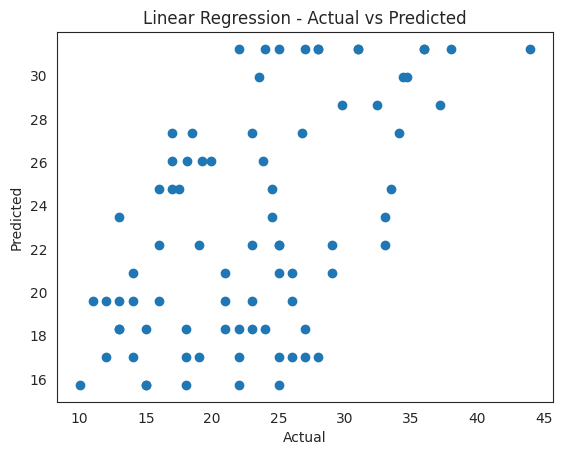

Random Forest Regressor - MSE: 34.92, R2: 0.35


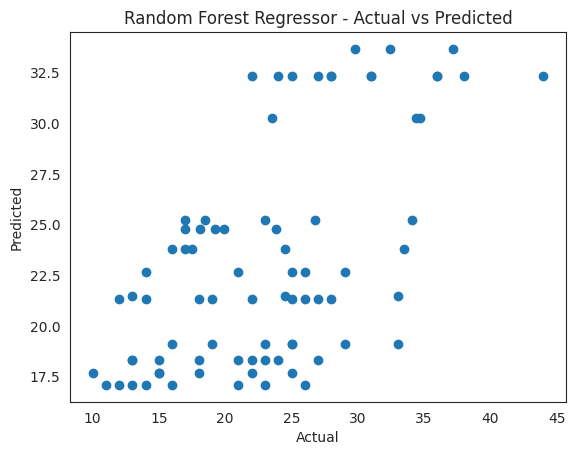

Decision Tree Regressor - MSE: 34.99, R2: 0.35


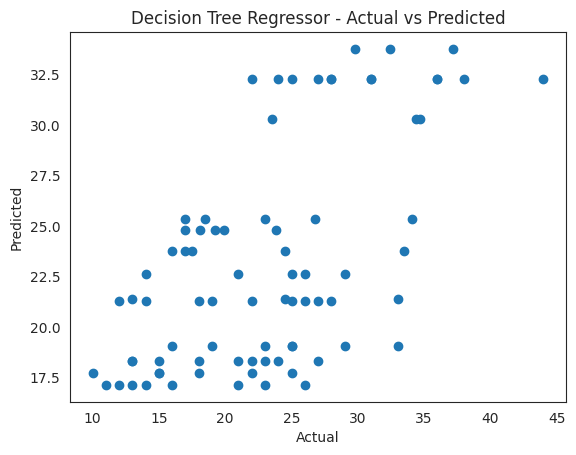

Support Vector Regression (SVR) - MSE: 37.97, R2: 0.29


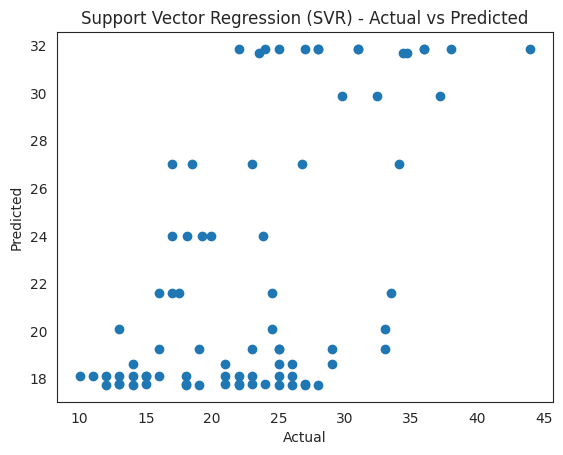

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K- Means CLustering - MSE: 538.81, R2: -9.02


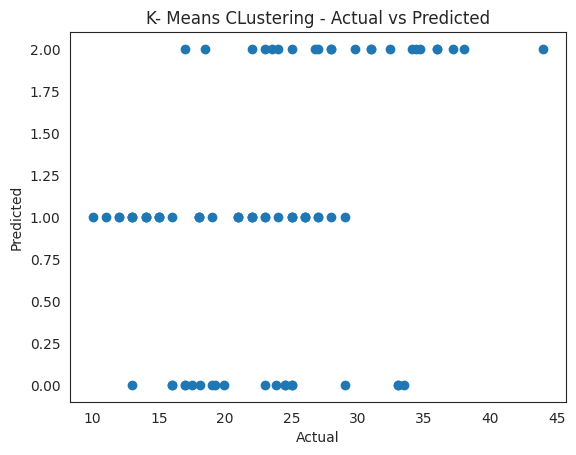

In [85]:
for name, model in models.items():
    print(f'Model selected: {name}')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.2f}')

    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()

# Conclusion | Kesimpulan

Berdasarkan hasil evaluasi model yang disediakan, model yang baik dan harus dipilih untuk pemecahan masalah ini adalah Random Forest Regressor. Meskipun model Decision Tree Regressor memiliki kinerja yang serupa, Random Forest Regressor memiliki keunggulan dalam mengatasi overfitting dan bias model. Dengan Mean Squared Error (MSE) yang lebih rendah dan koefisien determinasi (R2) yang lebih tinggi, Random Forest Regressor dapat memberikan prediksi yang lebih akurat dan konsisten dalam memodelkan pemilihan area plat kendaraan.

Maksud dari pemilihan model pada kasus ini adalah untuk memilih model yang dapat menyelesaikan masalah pemilihan area plat kendaraan yang akan digunakan dalam pemantauan lalu lintas jalan, pembayaran tol otomatis, dan manajemen parkir. Dari kesimpulan dari hasil evaluasi model, model yang dapat dipilih adalah Random Forest Regressor, karena model ini memiliki nilai MSE yang lebih rendah dan nilai R2 yang lebih tinggi dibandingkan dengan model lainnya.

Dari kesimpulan tersebut, Random Forest Regressor menunjukkan kinerja yang lebih baik dibandingkan dengan model lainnya, karena nilai MSE dan R2 yang lebih rendah. Oleh karena itu, Random Forest Regressor dapat dipilih sebagai model yang baik untuk menyelesaikan masalah pemilihan area plat kendaraan yang akan digunakan dalam pemantauan lalu lintas jalan, pembayaran tol otomatis, dan manajemen parkir.
